# Artificial Neural Networks

It consists of a supervised learning algorithm, that consists of the reception of input and computation of a function with weights (in layers).

It can sort of mimmic a natural brain neural net, because of its structure with neurons and connections between them.

## Why use them?

In traditional Machine Learning, to compute predictions, one must feed input; perform feature engineering; feed features; perform the model; output, whereas in AI (Neural Nets), one must only feed input to the net to receive output. 

Neural Nets with multiple layers can in each node or in each layer detect different aspects of the input (specific patterns), for example if you feed dog images, a region of the net can form patterns for the eyes, another for the nose, et cetera. So basically the only requirement for learning is sufficient quantity of data.


## Perceptron

The Perceptron is the simplest ANN, since it only has one neuron and one output value. We will use it to start .


So, given the input matrix $X$, and weights $\mathbf{W} = \{w_j\}_{j=1}^N$ and bias $w_0$ we have the **activation function** $g: \mathbb{R}^{N+1} \rightarrow \mathbb{R}^M$:

\begin{equation}
\hat{y} = g( w_0 + \mathbf{X}^T \mathbf{W} )
\end{equation}

One of the most simple and popular activation functions is the sigmoid function:
\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}

Is is useful because it receibes a certain value $x$ and maps its value into the interval $[0,1]$, therefore possibily computing a probability measure.
Also, multiple activation functions can be used in different layers, to induce complexity to the model.

![](https://miro.medium.com/max/1400/1*hhNMFXoNOe_40eBm0I6KVQ.png)

- The activation function can help us to introduce "non-linearity" into the model, which is important when dealing with real data, that is not usually linear.

- The weigths can be adjusted (and must be!), and this process is the training process: by adjusting our weights, model performance can improve ("and learn").

- $w_0$ is our bias. It can alter our activation function argument independantly from the input $\mathbf{X}$.


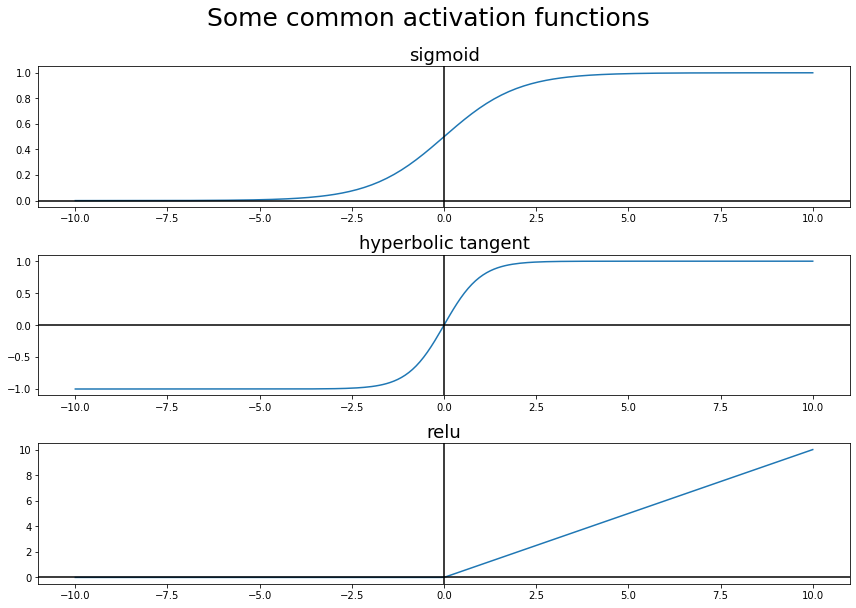

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
  return 1/(1+np.exp(-x))

def hyperbolic_tanget(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x):
  return max(0, x)

def plot_af():
  activation_functions = {
      'sigmoid': sigmoid, 'hyperbolic tangent': hyperbolic_tanget, 'relu': relu
  }
  plt.figure(figsize=(12,8))
  plt.suptitle('Some common activation functions', fontsize=25, y=1.05)
  c=0
  for f in list(activation_functions.keys()):
    c+=1
    plt.subplot(3,1,c)
    x = np.linspace(-10, 10, 200)
    y = list(map(activation_functions[f], x))
    
    plt.title(f, fontsize=18)
    plt.plot(x, y)
    plt.axvline(0, color='black')
    plt.axhline(0, color='black')
  
  plt.tight_layout()
  plt.show()

plot_af()



<br>




## Multioutput Neural Net

Generalizing our Neural Net, let us say we have $N$ input values, $K$ layers 
and $J$ output classes (taking it is a classification problem), our output expression would be:

\begin{equation}
\hat{y}_j = g(w_{0, j}^{(k)} + \sum_{i=1}^N x_i w_{i, j}^{(k)}) \quad \begin{cases}
\text{layers} & k=1, ..., K \\
\text{outputs} & j = 1, 2, ..., J
\end{cases}
\end{equation}


In the cases that we have an intermediate layer (neither input nor output), it can be called a "hidden layer".




## Deep Neural Nets

They are ANNs with a large quantity of hidden layers.





## Loss

To quantify the error and accuracy of a prediction (output of the net) $\hat{y}_j$, comparing to the real value $y_j$, we must define a Cost function

\begin{equation}
\mathcal{L} (\hat{y}_j, y_j): \mathbb{R}^n \rightarrow \mathbb{R}
\end{equation}

###  Empirical Loss 

Also called Objective Function, Cost Function, Empirical Risk. 
Taking $f$ as the function of the ANN.

\begin{equation}
J(\mathbf{W}) = \frac{1}{N} \sum_{i=1}^N \mathcal{L} \left( f(x^{(i)}; \mathbf{W}), y^{(i)} \right)  
\end{equation}

### Binary Cross Entropy Loss

\begin{equation}
J(\mathbf{W}) = \frac{1}{N} \sum_{i=1}^N y^{(i)} log \left(f(x^{(i)}; \mathbf{W}) \right) + (1 - y^{(i)}) log \left( 1 - f(x^{(i)}; \mathbf{W}) \right)
\end{equation}

- can be used for binary classification problems, since it computes a probability value.

### MSE

The Mean Squared Error (MSE) is computed by

\begin{equation}
J(\mathbf{W}) = \frac{1}{N} \sum_{i=1}^N \left( f(x^{(i)}; \mathbf{W})- y^{(i)} \right)^2  
\end{equation}

- This can be used for regression problems, to compute a Loss value in the continuous real line.




## Example

Let us see a simple example with 2 input nodes, 1 hidden layer and 1 output node

In [ ]:
# given the input data X
X = [
     [0.7, 0.4],
     [0.2, 0.8],
     [0.3, 0.9],
     [0.01, 0.01]
]

# weigths
W = [[1, 1],
     [1, 1],
     [1, 1],
     [1, 1]]

def simple_net(X, W, w0, hidden_layers=1):
  """ Simple Net with sigmoid activation function """
  y = []
  for j in range(len(X)): # for each sequence of inputs {x_j}_{j=1}^I, with I input nodes
    s=0
    for k in range(np.array(W).shape[1]): # for each hidden layer
      s += W[j][k] * X[j][k]
      print("j={}, k= {}, W[j][k]={}, X[j][k]={}, W[j][k] * X[j][k]={}".format(j, k, W[j][k], X[j][k], s))
    y.append(sigmoid(s + w0))

  print("Final Layer values: ", y)
  print('Output: ', sum(y))  

simple_net(X, W, w0=0)

j=0, k= 0, W[j][k]=1, X[j][k]=0.7, W[j][k] * X[j][k]=0.7
j=0, k= 1, W[j][k]=1, X[j][k]=0.4, W[j][k] * X[j][k]=1.1
j=1, k= 0, W[j][k]=1, X[j][k]=0.2, W[j][k] * X[j][k]=0.2
j=1, k= 1, W[j][k]=1, X[j][k]=0.8, W[j][k] * X[j][k]=1.0
j=2, k= 0, W[j][k]=1, X[j][k]=0.3, W[j][k] * X[j][k]=0.3
j=2, k= 1, W[j][k]=1, X[j][k]=0.9, W[j][k] * X[j][k]=1.2
j=3, k= 0, W[j][k]=1, X[j][k]=0.01, W[j][k] * X[j][k]=0.01
j=3, k= 1, W[j][k]=1, X[j][k]=0.01, W[j][k] * X[j][k]=0.02
Final Layer values:  [0.7502601055951177, 0.7310585786300049, 0.7685247834990175, 0.5049998333399998]
Output:  2.75484330106414


This simple example shows us that if we don't use a activation function, we simply compute a linear relationship to our data, and that our weights must be adjusted for us to leave random computations and achieve pattern recognition.

## Training - Loss Optimization

The training process consists of a optimization process, since, given our weigths, we have want to minimize a given cost function , to improve accuracy, by adjusting our weights.

\begin{equation}
\mathbf{W}^* = \underset{W}{argmin} \frac{1}{N} \sum_{i=1}^N \mathcal{L} \left( f(x^{(i)}; \mathbf{W}), y^{(i)} \right)  = \underset{W}{argmin} J(\mathbf{W})
\end{equation}

![](https://miro.medium.com/max/1400/1*RKozQgltgcJh89HtVlxzkw.png)



## Gradient Descent

A simple algorithm for optimizing our Loss function through gradient computation, given a learning rate $\eta$:

- 1) Initialize pseudo-random weights $\mathbf{W} \sim \mathcal{N}(0, \sigma^2)$
- 2) while $\nabla J(\mathbf{W}) \neq 0 $ (loop until convergence)
- 2.1) Compute $\nabla J(\mathbf{W})$
- 2.2) Update weights $\mathbf{W} \leftarrow \mathbf{W} - \eta \nabla J(\mathbf{W})$
- 3) return optimized weigths $\mathbf{W}^*$

<br>


#### Notes:

- Note that in our algorithm steps, with 
\begin{equation}
x^{k+1} = x^k + t_k d^k
\end{equation}
we are taking a step $t_k$ (relative to the learning rate), in the direction $d^k$. In gradient descent, the direction is $d^k = - \nabla J(\mathbf{W})$, because the gradient points to the maximum, so we take orthogonal steps, searching for a minimum.

- The Loss Surfice (as in the figure above with $J(w_0, w_1)$ x $w_0$ x $w_1$ can have multiple local minimals, and we want the global minimal. So one must be careful to decide the learning rate $\eta$, for not to take too little steps (increasing computational time), nor too large steps (and skipping the minimal region).

- In gradient descent backpropagation, basically we update each weight by a small amount, considering a learning rate.

<br>



### Stochastic Gradient Descent

In this method, random samples are selected to compute the gradient.
Algorithm:

- 1) Initialize weights $\mathbf{W} \sim \mathcal{N}(0,\sigma^2)$
- 2) while $\nabla J(\mathbf{W}) \neq 0$ (loop until co
nvergence)
- 2.1) sample a batch of $B$ data points
- 2.2) Compute the gradient at the selected batch $\frac{\partial J(\mathbf{W})}{\partial \mathbf{W}} = \frac{1}{B} \sum_{k=1}^B \frac{\partial J_k(\mathbf{W})}{\partial \mathbf{W}}$
- 2.3) update weights $\mathbf{W} \leftarrow \mathbf{W} - \eta \nabla  J(\mathbf{W})$
- 3) return weights $\mathbf{W}^*$


<br>



## Backpropagation

It is the process of computing the gradients and training feedforward neural networks

In [18]:
import random

def create_random_weights(rowdim=4, coldim=2):
  """ Given the dimensions of rows and columns, create a matrix with values:
  u_1 (-1)^(u_2), u_1, u_2 \sim U[0,1]
  i.e. a uniform number that might have a minus sign
  """

  W = []
  for r in range(rowdim):
    W.append([])
    for c in range(coldim):
      W[r].append(np.random.uniform()*((-1)**round(np.random.uniform())))

  return W

create_random_weights()

[[0.22972808230970665, 0.9273836410739588],
 [-0.5081797922848657, -0.5133557483459836],
 [-0.4464993139568254, -0.059074472410352796],
 [-0.7863491811557749, -0.23029365785182865]]

In [45]:
#implementing Gradient Descent and backpropagation

import numpy as np
from copy import deepcopy


# activation function
def sigmoid(x):
  return 1/(1+np.exp(-x))

# loss function
def mse(y, y_pred):
  return np.mean(np.square(np.array(y) - np.array(y_pred)))


def simple_net(X, y, W, w0, hidden_layers=1, y_true=0, verbose=False):
  """ Simple Net with sigmoid activation function """
  y_pred = []
  for j in range(len(X)): # for each sequence of inputs {x_j}_{j=1}^I, with I input nodes
    s=0
    for k in range(np.array(W).shape[1]): # for each hidden layer
      s += W[j][k] * X[j][k]
      if verbose:
        print("j={}, k= {}, W[j][k]={}, X[j][k]={}, W[j][k] * X[j][k]={}".format(j, k, W[j][k], X[j][k], s))
    y_pred.append(sigmoid(s + w0))

  if verbose:
    print("Final Layer values: ", y)
    print('Output: ', sum(y))  
  return mse(y=y, y_pred=y_pred)

def backprop(X, y, W, 
             dif=0.0001,
             eta=0.01,
             w0 = -0.5516,
             verbose=False
             ):
  
  loss_0 = simple_net(X, y, W, w0, verbose=verbose)
  w_update = deepcopy(W)
  adj_w = deepcopy(W)

  for i, layer in enumerate(W):
    for j, w_j in np.ndenumerate(layer):
      if verbose:
        print('i: {}, j: {}, w_j: {}'.format(i, j, w_j))
      j=j[0]
      # small difference in weights
      adj_w[i][j] += dif

      aditional_loss = simple_net(X, y, adj_w, w0, verbose=verbose)

      # \nabla J(W) = \frac{\partial J(\mathbf{W})}{\partial \mathbf{W}}
      grad = (aditional_loss - loss_0) / dif

      # W <- W - \eta * \nabla J(W)
      w_update[i][j] -= eta * grad

  return w_update, loss_0

In [46]:
def test_loss(X, y, W, w0, epochs=100):
  loss=[]
  for epoch in range(epochs):
    W, l = backprop(X, y, W, w0)
    loss.append(l)

  plt.figure(figsize=(15,4))
  plt.title('Loss function x epochs')
  plt.plot(loss)
  plt.show()

'''
W = np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]])
w0 = -0.5516
X = [[1, 1]]
y = np.array([[0]])


test_loss(X, y, W, w0, epochs=3000)
'''

'\nW = np.array([[-0.0053, 0.3793],\n              [-0.5820, -0.5204],\n              [-0.2723, 0.1896]])\nw0 = -0.5516\nX = [[1, 1]]\ny = np.array([[0]])\n\n\ntest_loss(X, y, W, w0, epochs=3000)\n'

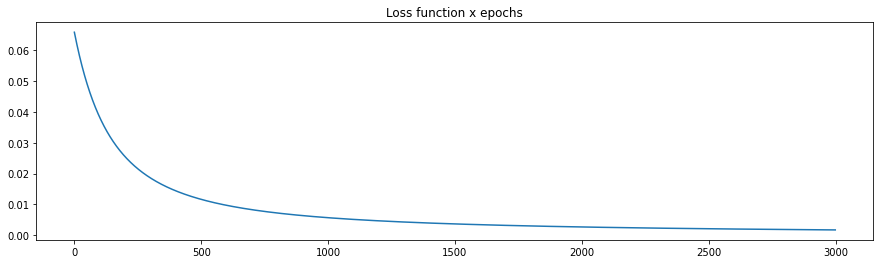

In [47]:
# generating random weights and bias
W = create_random_weights(3, 2)
w0 = create_random_weights(1,1)[0][0]

# given the input
X = [[1, 1]]

# and the actual value
y = np.array([[0]])

# adjust weight through gradient descent backpropagation to minimize loss
test_loss(X, y, W, w0, epochs=3000)

In [48]:
# given the input data X
X = [
     [0.7, 0.4],
     [0.2, 0.8],
     [0.3, 0.9],
     [0.01, 0.01]
]
y = np.array([[0]])

# weigths
W = create_random_weights(4, 2)
w0 = -0.5516

backprop(X, y, W, w0, verbose=True)

j=0, k= 0, W[j][k]=-0.6016959373589182, X[j][k]=0.7, W[j][k] * X[j][k]=-0.42118715615124275
j=0, k= 1, W[j][k]=0.8776325229643589, X[j][k]=0.4, W[j][k] * X[j][k]=-0.07013414696549919
j=1, k= 0, W[j][k]=0.3206434547013204, X[j][k]=0.2, W[j][k] * X[j][k]=0.06412869094026408
j=1, k= 1, W[j][k]=0.8855268518762458, X[j][k]=0.8, W[j][k] * X[j][k]=0.7725501724412608
j=2, k= 0, W[j][k]=0.6430365439526071, X[j][k]=0.3, W[j][k] * X[j][k]=0.19291096318578213
j=2, k= 1, W[j][k]=-0.022319621495935804, X[j][k]=0.9, W[j][k] * X[j][k]=0.17282330383943992
j=3, k= 0, W[j][k]=-0.44887512611931557, X[j][k]=0.01, W[j][k] * X[j][k]=-0.004488751261193156
j=3, k= 1, W[j][k]=-0.6476148590463662, X[j][k]=0.01, W[j][k] * X[j][k]=-0.010964899851656818
Final Layer values:  [[0]]
Output:  [0]
i: 0, j: (0,), w_j: -0.6016959373589182
j=0, k= 0, W[j][k]=-1.1532959373589182, X[j][k]=0.7, W[j][k] * X[j][k]=-0.8073071561512427
j=0, k= 1, W[j][k]=0.8776325229643589, X[j][k]=0.4, W[j][k] * X[j][k]=-0.45625414696549915
j=1,

([[-0.6019251279691497, 0.877311665460072],
  [0.3201882258482481, 0.8846020809687967],
  [0.6419742435461838, -0.023684247760512176],
  [-0.4502439379277646, -0.6489878353278336]],
 0.1817566000006355)

Another way of looking at the gradient descent computing is trought the chain rule, in which

\begin{equation}
\frac{ \partial J(\mathbf{W})}{\partial w_j} = \frac{ \partial J(\mathbf{W})}{\partial \hat{y_j}} \frac{\partial \hat{y}}{\partial w_j} =  \frac{ \partial J(\mathbf{W})}{\partial \hat{y_j}} \frac{\partial \hat{y}}{\partial z_j} \frac{\partial z_j}{\partial w_j}
\end{equation}

In a chain operation
\begin{equation}
(x) \overset{w_1}{\rightarrow} (z_1) \overset{w_2}{\rightarrow} (\hat{y}) \rightarrow J(\mathbf{W})
\end{equation}

## Authors:
- Pedro Blöss Braga

## Repository:
https://github.com/pedroblossbraga/NeuralNets

## LICENSE: 
- MIT